In [1]:
#!pip install matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
CSV = './all_stock_price/public/2330.TW.csv'

daily_trade =pd.read_csv('{}'.format(CSV))
daily_trade = daily_trade.to_dict()

Dic_Open = {}
Dic_High = {}
Dic_Low = {}
Dic_Close = {}
Dic_Volume = {}


for count in range(len(daily_trade['Date'])):
    Dic_Open[daily_trade['Date'][count]] = daily_trade['Open'][count]
    Dic_High[daily_trade['Date'][count]] = daily_trade['High'][count]
    Dic_Low[daily_trade['Date'][count]] = daily_trade['Low'][count]
    Dic_Close[daily_trade['Date'][count]] = daily_trade['Close'][count]
    Dic_Volume[daily_trade['Date'][count]] = daily_trade['Volume'][count]

In [3]:
# from dict ----> dataframe -----> plot
def simple_plot_function(fun = {'a':1.0},name = 'name',astype = 'float64'):
    name = str(name)
    if not type(fun)== dict:
        print('type error')

    else:    
        df  =  
        df[name] = df[name].astype(astype)
    return df[name].plot(kind = 'line')

In [7]:
Dict = {'a':1}

In [8]:
import pandas as pd
import numpy as np

In [9]:
pd.Series(Dict,Dict.keys()).to_frame().to_csv('./name.csv')

In [4]:
L = [l for l in Dic_Close.values()]
D = [d for d in daily_trade['Date'].values()]

# 均線(移動平均)

In [5]:
# 均線(移動平均)
def Moving_Average(interval = 5):
    L = [l for l in Dic_Close.values()]
    Dic_MA = {}
    interval  =int(interval)
    for i in range(len(L)):
        if i-interval <0:
            pass
        else:
            Dic_MA[D[i]]="{:}".format(sum(L[i-interval:i])/interval)
    return Dic_MA

#Moving_Average(interval = 5)

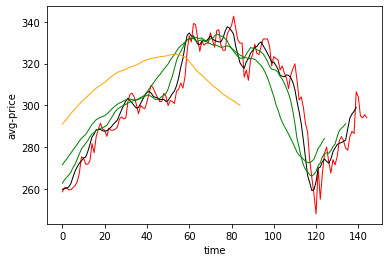

<Figure size 864x216 with 0 Axes>

In [6]:
# DEMO

M5 = [float(d) for d in Moving_Average(interval = 5).values()]
M10 = [float(d) for d in Moving_Average(interval = 10).values()]
M20 = [float(d) for d in Moving_Average(interval = 20).values()]
M60 =[float(d) for d in Moving_Average(interval = 60).values()]
Price = [float(d) for d in Dic_Close.values()]
plt.ylabel('avg-price')
plt.xlabel('time')
plt.plot(Price[900:],linewidth=1, color='red')
plt.plot(M5[900:],linewidth=1, color='black')
plt.plot(M10[900:],linewidth=1, color='green')
plt.plot(M20[900:],linewidth=1, color='green')
plt.plot(M60[900:],linewidth=1, color='orange')
plt.figure(figsize=(12,3))
plt.show()


In [88]:
MA = 5
Result_df = pd.Series( Moving_Average(interval = MA),name='MA{}'.format(MA)).to_frame()

Result_df
# df1['test'] = df2['MA']
# df1

,MA5
2016-01-11,115.402
2016-01-12,114.3
2016-01-13,113.452
2016-01-14,113.11200000000001
2016-01-15,112.85600000000002
2016-01-18,113.36599999999999
2016-01-19,114.04400000000001
2016-01-20,114.89200000000001
2016-01-21,115.06199999999998
2016-01-22,115.65599999999999


In [7]:
# Bias
def Bias(days = 3,date = '2020-02-19'):
    try:
        x = Dic_Close[date]
        y = float( Moving_Average( interval = days )[date] )
        Result = (x-y)/y
    except KeyError as f:
        Result = 100.0
    return Result

In [8]:
# Bias Demo
Bias_Dic = {}
for date in Dic_Close.keys(): 
        Bias_Dic[date] = Bias(days = 3,date = date)
        
# Bias in (0,0.1)
result = []
for date in Bias_Dic.keys():
    if 0 <= Bias_Dic[date] < 0.1:
        result.append(date)
print(result[:5])

['2016-01-13', '2016-01-15', '2016-01-18', '2016-01-19', '2016-01-22']


# 指數移動平均  12days 26days

In [9]:
def EMA(day = 12):

    Result_List = []
    Result_Dic = {}
    day  =int(day)
    for i in range(len(L)):
        denominator_EMA = 0
        fraction_EMA = 0
        if i-day < 0:
            Result_List.append('NaN')
        else:
            interval_price = L[i - day:i]
            alpha = ((2/(day+1)))
            for c in range(day):
                denominator_EMA += (1-alpha)**c
                fraction_EMA += ((1-alpha)**c)*float(interval_price[c])
            Result_List.append (fraction_EMA / denominator_EMA )
            Result_Dic = dict(zip(D,Result_List))
    return Result_Dic

In [10]:
# 12天指數移動平均
A = EMA(day = 12)
# 26天指數移動平均
B = EMA(day = 26)
# 9天指數移動平均
C = EMA(day = 9)

# 繪圖

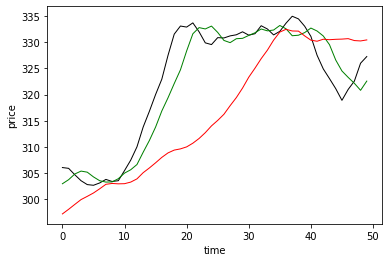

<Figure size 864x216 with 0 Axes>

In [11]:
EMA_9 = [e for e in C.values()]
EMA_12 = [e for e in A.values()]
EMA_26 = [e for e in B.values()]


plt.ylabel('price')
plt.xlabel('time')
plt.plot(EMA_9[950:1000],linewidth=1, color='black')
plt.plot(EMA_12[950:1000],linewidth=1, color='green')
plt.plot(EMA_26[950:1000],linewidth=1, color='red')

plt.figure(figsize=(12,3))
plt.show()

# MACD

In [12]:
def DIF(day1 = 12,day2 = 26):
    day1 = int(day1)
    day2 = int(day2) 
    Result_List = []
    EMA_1 = [e for e in EMA(day = day1).values()]
    EMA_2 = [e for e in EMA(day = day2).values()]
    for c in range(len(EMA_1)):
        try:
            Result_List.append(EMA_1[c] - EMA_2[c])
        except TypeError as e:
            Result_List.append('NaN')
        Result_Dic = dict(zip(D,Result_List))


            
    return Result_Dic

In [13]:
# DEMO of DIF


#DIF(day1 = 12,day2 = 26)

In [14]:
def MACD(day = 9):
    mL = [l for l in DIF(day1 = 12,day2 = 26).values()]
    mResult_List = []
    mResult_Dic = {}
    day  =int(day)
    for i in range(len(L)):
        denominator_EMA = 0
        fraction_EMA = 0
        if i-day < 0:
            mResult_List.append('NaN')

        else:
            interval_price = mL[i - day:i]
            alpha = ((2/(day+1)))
            for c in range(day):
                denominator_EMA += (1-alpha)**c
                fraction_EMA += ((1-alpha)**c)*float(interval_price[c])
            mResult_List.append (fraction_EMA / denominator_EMA )
            mResult_Dic = dict(zip(D,mResult_List))
    return mResult_Dic   

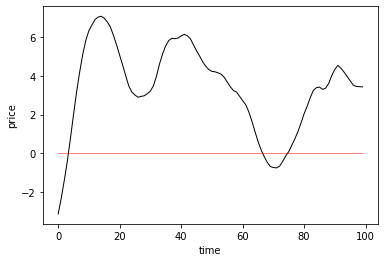

<Figure size 864x216 with 0 Axes>

In [15]:
MACD_List = [x for x in MACD(day = 9).values()]
X = [0 for x in MACD(day = 9).values()]

plt.ylabel('price')
plt.xlabel('time')
plt.plot(MACD_List[100:200],linewidth=1, color='black')
plt.plot(X[100:200], linewidth=0.5, color='red')
plt.figure(figsize=(12,3))
plt.show()

# RSV

# 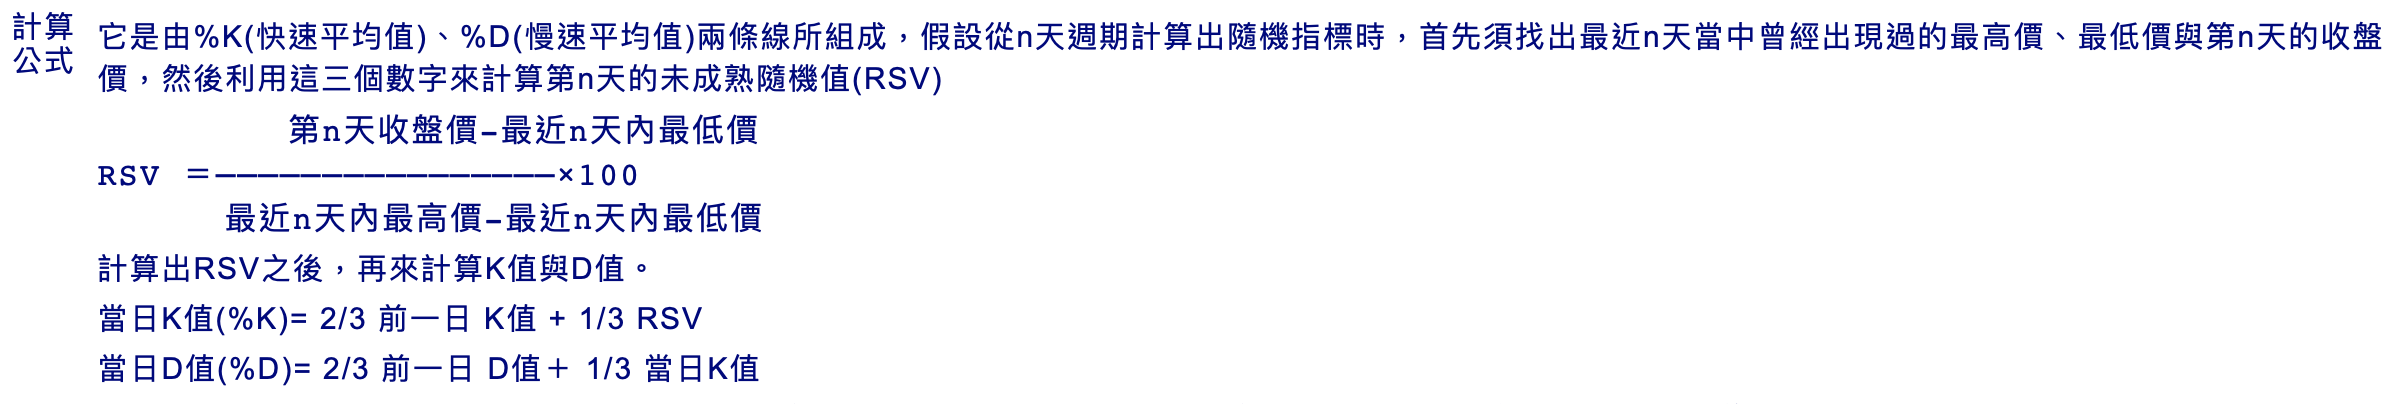

In [16]:
daily_trade =pd.read_csv('{}'.format(CSV))
daily_trade = daily_trade.to_dict()

Dic_Open = {}
Dic_High = {}
Dic_Low = {}
Dic_Close = {}
Dic_Volume = {}

for count in range(len(daily_trade['Date'])):
    Dic_Open[daily_trade['Date'][count]] = daily_trade['Open'][count]
    Dic_High[daily_trade['Date'][count]] = daily_trade['High'][count]
    Dic_Low[daily_trade['Date'][count]] = daily_trade['Low'][count]
    Dic_Close[daily_trade['Date'][count]] = daily_trade['Close'][count]
    Dic_Volume[daily_trade['Date'][count]] = daily_trade['Volume'][count]

In [17]:
# for d in Dic_Close.keys():
#     print([d,Dic_Open[d],Dic_High[d],Dic_Low[d],Dic_Close[d]])

In [18]:
def RSV(n = 9):
    Close_List = [l for l in Dic_Close.values()]
    High_List = [h for h in Dic_High.values()]
    Low_list = [low for low in Dic_Low.values()]
    D = [d for d in Dic_Close.keys()]
    day = int(n)
    Result_List = []
    for i in range(len(Close_List)):
        denominator_RSV = 0
        fraction_RSV = 0
        min_price = 0.0
        Max_price = 0.0
        Result = 0.0
        if i-day < 0:
            Result_List.append('NaN')
        else:
            interval_close_price = Close_List[i - day:i]
            interval_high_price = High_List[i - day:i]
            interval_low_price = Low_list[i - day:i]            
            min_price = min(interval_low_price)
            Max_price = max(interval_high_price)
            
            denominator_RSV = Max_price - min_price
            fraction_RSV = Close_List[i] - min_price
            Result = fraction_RSV / denominator_RSV
            Result_List.append(Result)
    Result_dict = dict(zip(D,Result_List))
    return Result_dict            

In [19]:
#RSV(n = 9)

#  Bonus: Dict to Dataframe 

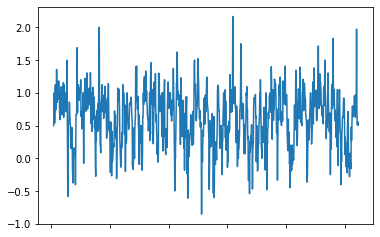

In [20]:
simple_plot_function(fun = RSV(n = 9),name = "RSV",astype = 'float64')

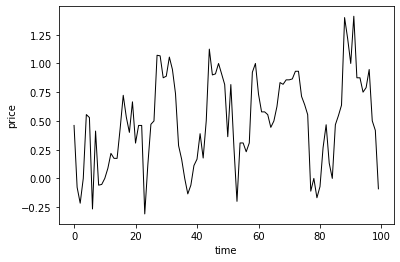

<Figure size 864x216 with 0 Axes>

In [21]:
RSV_List = [x for x in RSV(n = 9).values()]
plt.ylabel('price')
plt.xlabel('time')
plt.plot(RSV_List[200:300],linewidth=1, color='black')

plt.figure(figsize=(12,3))
plt.show()

# KD

In [22]:
def K_values(dic = RSV()):
    Days = [d for d in dic.keys()][9:]
    Null_list = ['NaN' for i in range(9)]
    K_value = 0.0
    K_list = []
    for day in Days:
        K_value = (K_value)*(2/3)+ (dic[day])*(1/3)
        K_list.append(K_value)
    K_list = ['NaN' for i in range(9)] + K_list
    Result_Dic = dict(zip([d for d in dic.keys()],K_list))
    return Result_Dic

In [23]:
# K_values(dic = RSV())

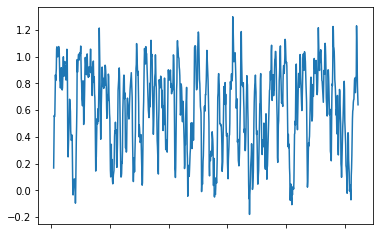

In [24]:
simple_plot_function(fun = K_values(dic = RSV()),name = "K_values",astype = 'float64')

In [25]:
def D_values():
    Result_Dic = K_values(dic = K_values())
    return Result_Dic

In [26]:
# D_values()

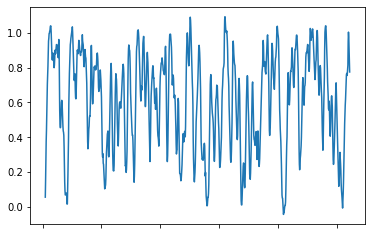

In [27]:
simple_plot_function(fun = D_values(),name = "D_values",astype = 'float64')

# KD 線

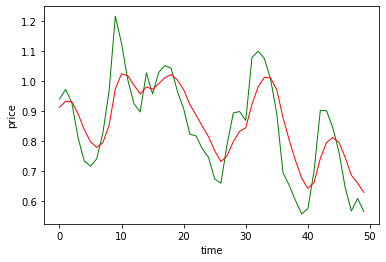

<Figure size 864x216 with 0 Axes>

In [28]:
K_List = [x for x in K_values().values()]
D_List = [x for x in D_values().values()]
plt.ylabel('price')
plt.xlabel('time')
plt.plot(K_List[900:950],linewidth=1, color='green')
plt.plot(D_List[900:950],linewidth=1, color='red')
plt.figure(figsize=(12,3))
plt.show()

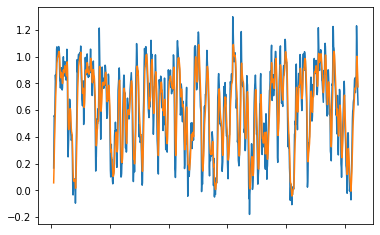

In [29]:
df_K = pd.Series( K_values(),K_values().keys(),name='K_line' ).to_frame()
df_D = pd.Series( D_values(),D_values().keys(),name='D_line' ).to_frame()
df_K['K_line'] = df_K['K_line' ].astype('float64')
df_K['D_line'] = df_D['D_line' ].astype('float64')
df_K['K_line'].plot(kind = 'line')
df_K['D_line'].plot(kind = 'line')

# Volume

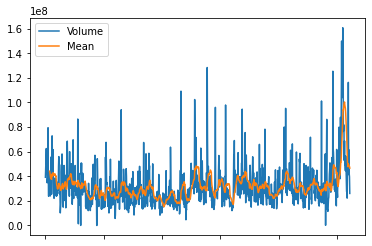

In [30]:
df  = pd.Series( Dic_Volume,Dic_Volume.keys(),name='Volume').to_frame()
df['Mean'] = df['Volume'].rolling(window = 15).mean()
df[['Volume','Mean']].plot(kind = 'line')

In [31]:
def Mean_Volume(interval = 15):
    L = [l for l in Dic_Volume.values()]
    D = [d for d in Dic_Volume.keys()]
    interval = int(interval)
    Dic_MV = {}
    for i in range(len(L)):
        if i - interval <0:
            pass
        else:
            Dic_MV[D[i]]="{}".format(sum(L[i-interval:i])/interval)
    return Dic_MV

In [32]:
# Mean_Volume(interval = 15)

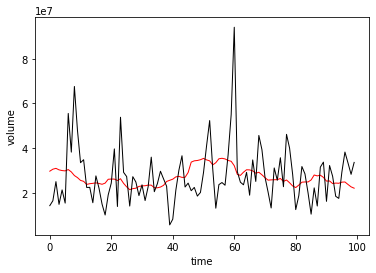

<Figure size 864x216 with 0 Axes>

In [33]:
MV_List = [float(x) for x in Mean_Volume(interval = 15).values()]
DV_List = [float(x) for x in Dic_Volume.values()]
plt.ylabel('volume')
plt.xlabel('time')
plt.plot(MV_List[200:300],linewidth=1, color='red')
plt.plot(DV_List[200:300],linewidth=1, color='black')
plt.figure(figsize=(12,3))
plt.show()

# Summary  -- Buy

# 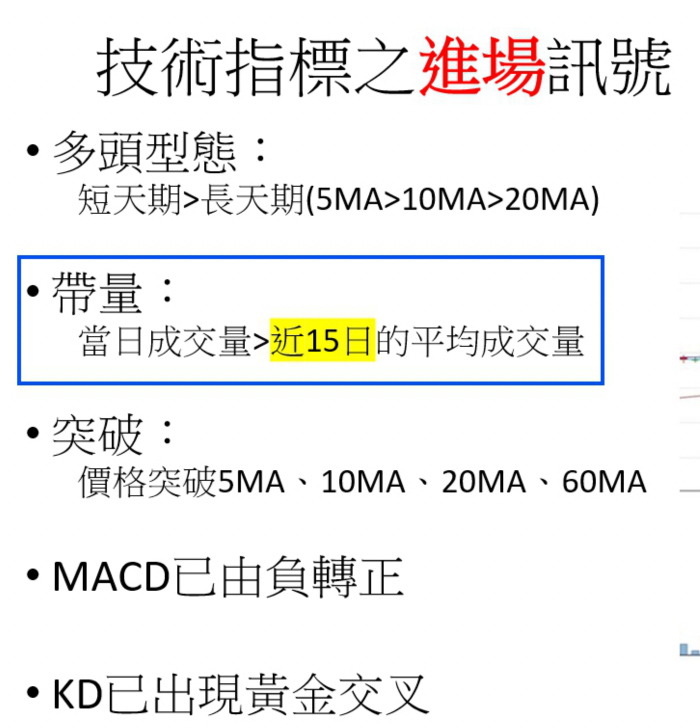

In [34]:
# 向上開花

In [35]:
def All_Average_good():
    Result = []
    All_Moving_Average = {}
    for date in Moving_Average(60):
        All_Moving_Average[date] = [Moving_Average(5)[date],Moving_Average(10)[date],Moving_Average(20)[date],Moving_Average(60)[date]]

    for date in All_Moving_Average.keys():
        M5 = All_Moving_Average[date][0]
        M10 = All_Moving_Average[date][1]
        M20 = All_Moving_Average[date][2]
        M60 = All_Moving_Average[date][3]
        if M5 >= max(All_Moving_Average[date]) and M60 <= min(All_Moving_Average[date]) and M10 >= M20:
            Result.append(date)
    return Result

In [36]:
# 突破

In [37]:
def price_good(price_dict = Dic_Close , day1 = 5 , day2 = 10 , day3 = 20 ,day4 = 60):
    day1,day2,day3,day4 = int(day1),int(day2),int(day3),int(day4)
    Result = []
    All_Moving_Average = {}
    for date in Moving_Average(day4):
        if price_dict[date] > max(float(Moving_Average(day1)[date]),float(Moving_Average(day2)[date]),float(Moving_Average(day3)[date]),float(Moving_Average(day4)[date])):
            Result.append(date)
    return Result

In [38]:
# MACD 由負轉正

In [39]:
def MACD_good(n = 9):
    n = int(n)
    func = MACD(day = n).copy()
    Result_list = []
    del_list = []
    for t in func.keys():
        if type(func[t]) == str:
            del_list.append(t)
    for d in del_list:
        del func[d]
    times = [t for t in func.keys()]
    prices = [p for p in func.keys()]  

    for i in range(len(times)):
        try:
            if func[times[i]] < 0 and func[times[i+1]] > 0:
                Result_list.append(times[i])
        except IndexError as e:
            pass
    return Result_list

In [40]:
# 帶量 當日成交量 > 十五日平個成交量

In [41]:
def Volume_good(day = 15):
    day = int(day)
    dates = [d for d in Mean_Volume(interval = day).keys()]
    Result_List = []
    for date in dates:
        if float(Dic_Volume[date]) > float(Mean_Volume(interval = day)[date]):
            Result_List.append(date)
    return Result_List    

In [42]:
# KD 出現黃金交叉

In [43]:
def Gold_Cross(difference = 0.1):
    Result_List = []
    difference = float(difference)
    for d in K_values():
        if float(K_values()[d]) - float(D_values()[d]) > difference:
            Result_List.append(d)
    return Result_List

# 調高difference降低可能的天數

# Testing

In [44]:
# prepare for testing analysis d
S1 = All_Average_good().copy()
S2 = price_good(price_dict = Dic_Close , day1 = 5 , day2 = 10 , day3 = 20 ,day4 = 60).copy()
S3 = MACD_good(n = 9).copy()
S4 = Volume_good(day = 15).copy()
S5 = Gold_Cross(difference = 0.1).copy()

# list(set(S1).intersection(set(S2)).intersection(set(S3)).intersection(set(S4)).intersection(set(S5)))
result = list(set(S1).intersection(set(S2)))


In [45]:
Date = [date for date in Dic_Close.keys()][26:]
Prices = [float(price) for price in Dic_Close.values()][26:]
R = []
for d in range(1,len(Date)):
    if Prices[d-4] < Prices[d] or Prices[d-4] < Prices[d-3] or Prices[d-4] < Prices[d-2] or Prices[d-4] < Prices[d-1]or Prices[d-4] < Prices[d]:
        R.append(Date[d-4])

        
for d in range(1,len(Date)):
    if Prices[d] <= max(Prices[d:d+4]):
        R.append(Date[d])
        
R

['2020-04-22',
 '2016-02-23',
 '2016-02-24',
 '2016-02-25',
 '2016-02-26',
 '2016-03-01',
 '2016-03-02',
 '2016-03-04',
 '2016-03-07',
 '2016-03-08',
 '2016-03-09',
 '2016-03-10',
 '2016-03-11',
 '2016-03-14',
 '2016-03-15',
 '2016-03-16',
 '2016-03-17',
 '2016-03-18',
 '2016-03-22',
 '2016-03-24',
 '2016-03-25',
 '2016-03-28',
 '2016-03-29',
 '2016-03-30',
 '2016-04-06',
 '2016-04-07',
 '2016-04-08',
 '2016-04-11',
 '2016-04-12',
 '2016-04-20',
 '2016-04-21',
 '2016-04-22',
 '2016-04-25',
 '2016-05-03',
 '2016-05-04',
 '2016-05-05',
 '2016-05-12',
 '2016-05-13',
 '2016-05-16',
 '2016-05-17',
 '2016-05-18',
 '2016-05-19',
 '2016-05-20',
 '2016-05-23',
 '2016-05-24',
 '2016-05-25',
 '2016-05-26',
 '2016-05-27',
 '2016-05-30',
 '2016-05-31',
 '2016-06-01',
 '2016-06-02',
 '2016-06-03',
 '2016-06-06',
 '2016-06-07',
 '2016-06-13',
 '2016-06-14',
 '2016-06-15',
 '2016-06-16',
 '2016-06-17',
 '2016-06-20',
 '2016-06-21',
 '2016-06-23',
 '2016-06-24',
 '2016-06-27',
 '2016-06-28',
 '2016-06-

In [46]:
# 準確率：P(Union|R)

# 失誤率：P(R|Union)



def Poss(X,Y):
    X ,Y = set(X),set(Y)
    Result_correct = len(X.intersection(Y))/len(Y)
    Result_error = len(X.difference(Y))/len(X)
    return [Result_correct,Result_error]
SS = [S1,S2,S3,S4,S5]  # SS == Union
A = [1,2,3,4,5]

print('='*70)

for j in range(5):
    Union_Set_for_1 = set(SS[j])
    Result = Poss(Union_Set_for_1,R)
    print('S{} {}：{:.2%} {}：{:.2%}'.format(j+1,' 命中率',Result[0],' 失誤率',Result[1]).replace('S1','向上開花').replace('S2','突破   ')\
          .replace('S3','MACD  ').replace('S4','帶量   ').replace('S5','黃金交叉'))

print('='*70)

for i in range(5):
    for j in range(5):
        if i < j :
            Union_Set_for_2 = set(SS[i]).union(set(SS[j]))
            Result = Poss(Union_Set_for_2,R)
            print('S{} S{} {}：{:.2%} {}：{:.2%}'.format(i+1,j+1,' 命中率',Result[0],' 失誤率',Result[1]).replace('S1','向上開花').replace('S2','突破   ')\
                  .replace('S3','MACD  ').replace('S4','帶量   ').replace('S5','黃金交叉')) 

print('='*70)

for i in range(5):
    for j in range(5):
        for k in range(5):
            if i < j < k :
                Union_Set_for_3 = set(SS[i]).union(set(SS[j]).union(set(SS[k])))
                Result = Poss(Union_Set_for_3,R)
                print('S{} S{} S{} {}：{:.2%} {}：{:.2%}'.format(i+1,j+1,k+1,' 命中率',Result[0],' 失誤率',Result[1]).replace('S1','向上開花').replace('S2','突破   ')\
                      .replace('S3','MACD  ').replace('S4','帶量   ').replace('S5','黃金交叉')) 

print('='*70)

for i in range(5):
    for j in range(5):
        for k in range(5):
            for y in range(5):
                if i < j < k < y :
                        Union_Set_for_4 = set(SS[i]).union(set(SS[j]).union(set(SS[k])).union(set(SS[y])))
                        Result = Poss(Union_Set_for_4,R)
                        print('S{} S{} S{} S{} {}：{:.2%} {}：{:.2%}'.format(i+1,j+1,k+1,y+1,' 命中率',Result[0],' 失誤率',Result[1]).replace('S1','向上開花').replace('S2','突破   ')\
                              .replace('S3','MACD  ').replace('S4','帶量   ').replace('S5','黃金交叉')) 

print('='*70) 

for i in range(5):
    for j in range(5):
        for k in range(5):
            for y in range(5):
                for z in range(5):
                    if i < j < k < y <z:
                            Union_Set_for_5 = set(SS[i]).union(set(SS[j]).union(set(SS[k])).union(set(SS[y])).union(set(SS[z])))
                            Result = Poss(Union_Set_for_5,R)
                            print('S{} S{} S{} S{} S{} {}：{:.2%} {}：{:.2%}'.format(i+1,j+1,k+1,y+1,z+1,' 命中率',Result[0],' 失誤率',Result[1]).replace('S1','向上開花').replace('S2','突破   ')\
                                  .replace('S3','MACD  ').replace('S4','帶量   ').replace('S5','黃金交叉')) 

print('='*70) 

向上開花  命中率：35.76%  失誤率：0.00%
突破     命中率：39.00%  失誤率：0.00%
MACD    命中率：1.77%  失誤率：0.00%
帶量     命中率：41.06%  失誤率：1.42%
黃金交叉  命中率：20.83%  失誤率：5.36%
向上開花 突破     命中率：51.96%  失誤率：0.00%
向上開花 MACD    命中率：36.94%  失誤率：0.00%
向上開花 帶量     命中率：60.41%  失誤率：0.97%
向上開花 黃金交叉  命中率：51.96%  失誤率：2.22%
突破    MACD    命中率：40.08%  失誤率：0.00%
突破    帶量     命中率：62.97%  失誤率：0.93%
突破    黃金交叉  命中率：46.86%  失誤率：2.45%
MACD   帶量     命中率：42.24%  失誤率：1.38%
MACD   黃金交叉  命中率：22.30%  失誤率：5.02%
帶量    黃金交叉  命中率：53.34%  失誤率：2.86%
向上開花 突破    MACD    命中率：52.75%  失誤率：0.00%
向上開花 突破    帶量     命中率：69.65%  失誤率：0.84%
向上開花 突破    黃金交叉  命中率：59.82%  失誤率：1.93%
向上開花 MACD   帶量     命中率：61.30%  失誤率：0.95%
向上開花 MACD   黃金交叉  命中率：52.95%  失誤率：2.18%
向上開花 帶量    黃金交叉  命中率：70.63%  失誤率：2.18%
突破    MACD   帶量     命中率：63.65%  失誤率：0.92%
突破    MACD   黃金交叉  命中率：47.84%  失誤率：2.40%
突破    帶量    黃金交叉  命中率：69.35%  失誤率：2.22%
MACD   帶量    黃金交叉  命中率：54.32%  失誤率：2.81%
向上開花 突破    MACD   帶量     命中率：70.33%  失誤率：0.83%
向上開花 突破    MACD   黃金交叉  命中率：60.51%  失誤率：1.91%
向上開花 突破    帶量 